In [1]:
# Notebook 4 - Graphing sites with several month's worth of data, 
# not just the five

In [2]:
import pandas as pd     
import numpy as np
import requests 
import matplotlib.pyplot as plt

In [3]:
########################################################
# The EA publish daily data on https://environment.data.gov.uk/
# flood-monitoring/archive giving river levels about once every 
# couple of hours.  Each file is a huge dataset, so my first task 
# will be to extract the data from each of the stations I am 
# interested in, ditch the rest and put them together into one 
# dataframe lasting multiple days (possibly a month eventually?)
# I will aim to start with the last 5 days of February
########################################################

In [4]:
# The file has "stationReference" as the key field I can search on 
# to tie back to the data I have, without searching on a url.
# From above:
#            ~ Cowley Bridge  = 45117
#            ~ Upton Hellions = 45136
#            ~ Yeoford        = 45137

In [5]:
df = pd.read_csv("data/df_all.csv") 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88314 entries, 0 to 88313
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dateTime          88314 non-null  object 
 1   date              88314 non-null  object 
 2   measure           88314 non-null  object 
 3   station           88314 non-null  object 
 4   label             88314 non-null  object 
 5   stationReference  88314 non-null  int64  
 6   parameter         88314 non-null  object 
 7   qualifier         88314 non-null  object 
 8   datumType         0 non-null      float64
 9   period            88314 non-null  float64
 10  unitName          88314 non-null  object 
 11  valueType         88314 non-null  object 
 12  value             88286 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 8.8+ MB


In [6]:
#df20240226 = pd.read_csv("data/readings-full-2024-02-26.csv") 
#mask_for_cowley = df20240226["stationReference"] == "45117"
#dfcowley = df20240226[mask_for_cowley]
#mask_for_upton = df20240226["stationReference"] == "45136"
#dfupton = df20240226[mask_for_upton]
#mask_for_yeoford = df20240226["stationReference"] == "45137"
#dfyeoford = df20240226[mask_for_yeoford]
#df26 = pd.concat([dfcowley, dfupton, dfyeoford], axis = 0)
#df26.info()

In [7]:
df.head(2)

,dateTime,date,measure,station,label,stationReference,parameter,qualifier,datumType,period,unitName,valueType,value
0,2023-03-31 00:00:00,31/03/2023,http://environment.data.gov.uk/flood-monitorin...,http://environment.data.gov.uk/flood-monitorin...,Cowley Bridge,45117,level,Stage,NaN,900.0,m,instantaneous,0.984
1,2023-03-31 01:00:00,31/03/2023,http://environment.data.gov.uk/flood-monitorin...,http://environment.data.gov.uk/flood-monitorin...,Cowley Bridge,45117,level,Stage,NaN,900.0,m,instantaneous,1.104


In [8]:
df["dateTime"] = pd.to_datetime(df["dateTime"], format='%Y-%m-%d %H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88314 entries, 0 to 88313
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dateTime          88314 non-null  datetime64[ns]
 1   date              88314 non-null  object        
 2   measure           88314 non-null  object        
 3   station           88314 non-null  object        
 4   label             88314 non-null  object        
 5   stationReference  88314 non-null  int64         
 6   parameter         88314 non-null  object        
 7   qualifier         88314 non-null  object        
 8   datumType         0 non-null      float64       
 9   period            88314 non-null  float64       
 10  unitName          88314 non-null  object        
 11  valueType         88314 non-null  object        
 12  value             88286 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 8.8+ MB


In [9]:
df_short = df[["dateTime", "date", "label", "stationReference", "value"]].copy()
df_short.head()

,dateTime,date,label,stationReference,value
0,2023-03-31 00:00:00,31/03/2023,Cowley Bridge,45117,0.984
1,2023-03-31 01:00:00,31/03/2023,Cowley Bridge,45117,1.104
2,2023-03-31 00:30:00,31/03/2023,Cowley Bridge,45117,1.040
3,2023-03-31 00:15:00,31/03/2023,Cowley Bridge,45117,1.012
4,2023-03-31 00:45:00,31/03/2023,Cowley Bridge,45117,1.072


In [10]:
df_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88314 entries, 0 to 88313
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dateTime          88314 non-null  datetime64[ns]
 1   date              88314 non-null  object        
 2   label             88314 non-null  object        
 3   stationReference  88314 non-null  int64         
 4   value             88286 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 3.4+ MB


In [11]:
# plan, plot each location as a seperate line graph on the same
# axis.  What should happen is that when Yeoford and Upton 
# increase Cowley increases after a lag, however I don't know what
# that lag will be and therefore if it will be visible 
# within my data.
# Need to find out how to plot against time.
# Next steps could be to look at either rainfall data for the same
# period, or alternatively look at data from a longer period.

In [12]:
# Do I need to do something to split the locations out again?

mask_for_cowley = df_short["stationReference"] == 45117
dfcowley = df_short[mask_for_cowley]
mask_for_upton = df_short["stationReference"] == 45136
dfupton = df_short[mask_for_upton]
mask_for_yeoford = df_short["stationReference"] == 45137
dfyeoford = df_short[mask_for_yeoford]
dfcowley.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31046 entries, 0 to 85335
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dateTime          31046 non-null  datetime64[ns]
 1   date              31046 non-null  object        
 2   label             31046 non-null  object        
 3   stationReference  31046 non-null  int64         
 4   value             31018 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 1.4+ MB


In [13]:
#OK, I need to sort my data!

In [14]:
# NOTE change the start date as more dates are added to the series

all_times_index = pd.date_range("2023-03-31 00:00:00", 
                                "2024-03-31 23:45:00", 
                                freq="15min")

In [15]:
all_times_index

DatetimeIndex(['2023-03-31 00:00:00', '2023-03-31 00:15:00',
               '2023-03-31 00:30:00', '2023-03-31 00:45:00',
               '2023-03-31 01:00:00', '2023-03-31 01:15:00',
               '2023-03-31 01:30:00', '2023-03-31 01:45:00',
               '2023-03-31 02:00:00', '2023-03-31 02:15:00',
               ...
               '2024-03-31 21:30:00', '2024-03-31 21:45:00',
               '2024-03-31 22:00:00', '2024-03-31 22:15:00',
               '2024-03-31 22:30:00', '2024-03-31 22:45:00',
               '2024-03-31 23:00:00', '2024-03-31 23:15:00',
               '2024-03-31 23:30:00', '2024-03-31 23:45:00'],
              dtype='datetime64[ns]', length=35232, freq='15T')

In [16]:
all_times = all_times_index.to_frame(index = False, 
                                     name = "all_times")

In [17]:
print(dfyeoford)

                 dateTime        date    label  stationReference  value
192   2023-03-31 00:00:00  31/03/2023  Yeoford             45137  0.928
193   2023-03-31 00:30:00  31/03/2023  Yeoford             45137  1.002
194   2023-03-31 00:15:00  31/03/2023  Yeoford             45137  0.965
195   2023-03-31 01:00:00  31/03/2023  Yeoford             45137  1.080
196   2023-03-31 00:45:00  31/03/2023  Yeoford             45137  1.052
...                   ...         ...      ...               ...    ...
88309 2024-02-29 11:15:00  2024-02-29  Yeoford             45137  0.634
88310 2024-02-29 05:45:00  2024-02-29  Yeoford             45137  0.592
88311 2024-02-29 05:00:00  2024-02-29  Yeoford             45137  0.586
88312 2024-02-29 04:45:00  2024-02-29  Yeoford             45137  0.583
88313 2024-02-29 06:00:00  2024-02-29  Yeoford             45137  0.584

[28343 rows x 5 columns]


In [19]:
all_times_yeoford = all_times.merge(dfyeoford, how = "left", 
                                    left_on = "all_times", 
                                    right_on = "dateTime")
all_times_yeoford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35232 entries, 0 to 35231
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   all_times         35232 non-null  datetime64[ns]
 1   dateTime          28343 non-null  datetime64[ns]
 2   date              28343 non-null  object        
 3   label             28343 non-null  object        
 4   stationReference  28343 non-null  float64       
 5   value             28343 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(2)
memory usage: 1.6+ MB


In [20]:
print(all_times_yeoford)

                all_times            dateTime        date    label  \
0     2023-03-31 00:00:00 2023-03-31 00:00:00  31/03/2023  Yeoford   
1     2023-03-31 00:15:00 2023-03-31 00:15:00  31/03/2023  Yeoford   
2     2023-03-31 00:30:00 2023-03-31 00:30:00  31/03/2023  Yeoford   
3     2023-03-31 00:45:00 2023-03-31 00:45:00  31/03/2023  Yeoford   
4     2023-03-31 01:00:00 2023-03-31 01:00:00  31/03/2023  Yeoford   
...                   ...                 ...         ...      ...   
35227 2024-03-31 22:45:00                 NaT         NaN      NaN   
35228 2024-03-31 23:00:00                 NaT         NaN      NaN   
35229 2024-03-31 23:15:00                 NaT         NaN      NaN   
35230 2024-03-31 23:30:00                 NaT         NaN      NaN   
35231 2024-03-31 23:45:00                 NaT         NaN      NaN   

       stationReference  value  
0               45137.0  0.928  
1               45137.0  0.965  
2               45137.0  1.002  
3               45137.0  1.

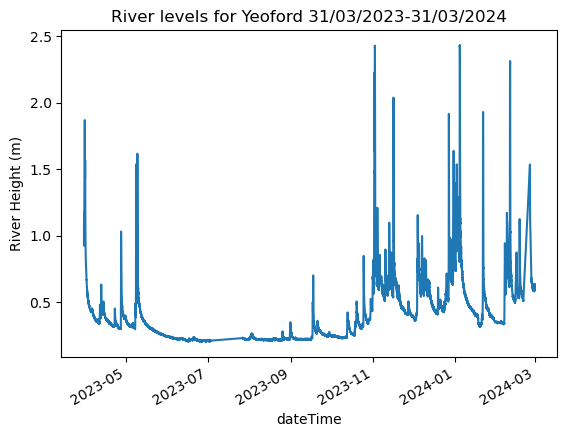

In [21]:
all_times_yeoford["value"] = all_times_yeoford["value"].astype(float) 
all_times_yeoford.plot(y="value", x="dateTime", kind='line',
                       ylabel="River Height (m)",
                     title="River levels for Yeoford 31/03/2023-31/03/2024", 
                     legend=False);

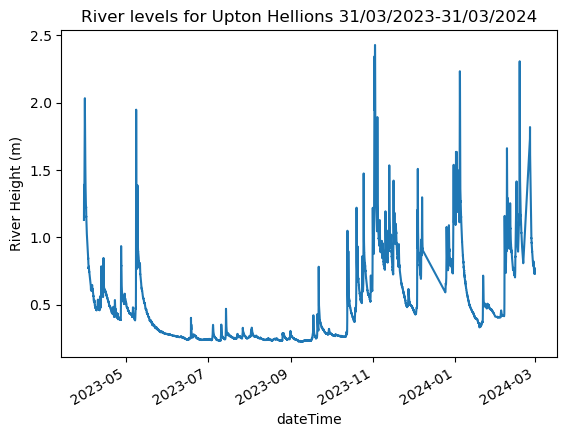

In [22]:
all_times_upton = all_times.merge(dfupton, how = "left", 
                                  left_on = "all_times", 
                                  right_on = "dateTime")
all_times_upton["value"] = all_times_upton["value"].astype(float) 
all_times_upton.plot(y="value", x="dateTime", kind='line', 
                     ylabel="River Height (m)",
                     title="River levels for Upton Hellions 31/03/2023-31/03/2024", 
                     legend=False);

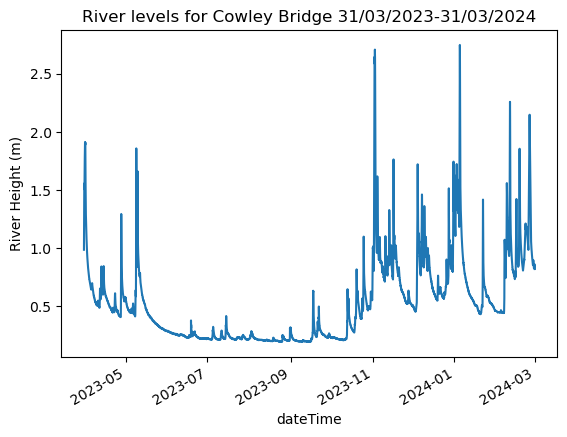

In [23]:
all_times_cowley = all_times.merge(dfcowley, how = "left", 
                                   left_on = "all_times", 
                                   right_on = "dateTime")
all_times_cowley["value"] = all_times_cowley["value"].astype(float) 
all_times_cowley.plot(y="value", x="dateTime", kind='line', 
                      ylabel="River Height (m)",
                     title="River levels for Cowley Bridge 31/03/2023-31/03/2024", 
                     legend=False);

In [24]:
# The signature of the three graphs looks similar (which is good)!

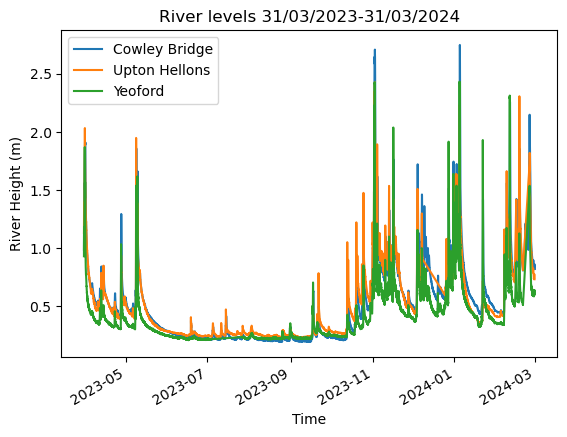

In [25]:
# plotting them all on the same graph

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
fig, ax = plt.subplots()

all_times_cowley["value"] = all_times_cowley["value"].astype(float) 
all_times_cowley.plot(ax=ax, y="value", x="dateTime", kind='line', 
                      ylabel="River Height (m)",
                     title="River levels 31/03/2023-31/03/2024");

all_times_upton["value"] = all_times_upton["value"].astype(float) 
all_times_upton.plot(ax=ax, y="value", x="dateTime", kind='line');

all_times_yeoford["value"] = all_times_yeoford["value"].astype(float) 
all_times_yeoford.plot(ax=ax, y="value", x="dateTime", kind='line');
ax.legend(["Cowley Bridge", "Upton Hellons", "Yeoford"])
ax.set_xlabel("Time");

In [26]:
# Visually you can see here the difference between the summer and 
# winter months in terms of river level.